In [9]:
# 라이브러리
import requests as req 
from bs4 import BeautifulSoup as bs 
import pandas as pd 

In [8]:
url = 'https://www.melon.com/chart/index.htm'
req.get(url)
# Response[400] : 클라이언트의 요청에 문제가 있을때 출력 코드 
# 멜론페이지에서 우리가 브라우저가 아닌 코드로 접근한것을 인지 > 접근불가 
# 브라우저인척 속여서 접근하기! (브라우저 정보 포함해서 요청)

<Response [406]>

In [12]:
# 코드로 접근하게되면 headers에서 브라우저 정보가 비어서 요청
# 비어있는 headers 정보를 채워서 요청 
h = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}

In [15]:
# 브라우저 정보 담아서 요청 
res = req.get(url,headers=h)
res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>멜론차트>TOP100>멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t

### 멜론차트에서 노래제목, 가수이름 수집

In [23]:
url = ('https://www.melon.com/chart/index.htm')

res = req.get(url,headers=h)

In [26]:
soup = bs(res.text,'lxml')
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

In [58]:
song = soup.select('div.ellipsis.rank01 > span > a')
# 공백 : 자손
# 공백 -> .변경
for i in range(len(song)):
    print(f'{i}',song[i].text)

0 Love Lee
1 후라이의 꿈
2 Seven (feat. Latto) - Clean Ver.
3 Smoke (Prod. Dynamicduo, Padi)
4 You & Me
5 Super Shy
6 Do or Die
7 Fast Forward
8 ETA
9 사랑은 늘 도망가
10 모래 알갱이
11 I Love My Body
12 사막에서 꽃을 피우듯
13 Either Way
14 우리들의 블루스
15 헤어지자 말해요
16 다시 만날 수 있을까
17 I AM
18 무지개
19 이제 나만 믿어요
20 London Boy
21 Bubble
22 Polaroid
23 아버지
24 인생찬가
25 Still With You
26 퀸카 (Queencard)
27 A bientot
28 Get A Guitar
29 잘 지내자, 우리 (여름날 우리 X 로이킴)
30 연애편지
31 Hype boy
32 Fact Check (불가사의; 不可思議)
33 Steal The Show (From “엘리멘탈”)
34 3D (feat. Jack Harlow)
35 이브, 프시케 그리고 푸른 수염의 아내
36 Spicy
37 Ditto
38 Kitsch
39 Love Me Again
40 New Jeans
41 CAKE
42 Dynamite
43 Summer (Feat. BE’O (비오))
44 너의 모든 순간
45 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
46 사건의 지평선
47 UNFORGIVEN (feat. Nile Rodgers)
48 After LIKE
49 KIDDING
50 Vancouver 2
51 Slow Dancing
52 LOVE DIVE
53 사랑인가 봐
54 Off The Record
55 I Don't Think That I Like Her
56 나에게 그대만이
57 OMG
58 심(心)
59 Attention
60 I WANT
61 Butter
62 봄날
63 Like Crazy
64 사랑하지 않아서 그랬어
65 Dreamers [Music from the

IndexError: list index out of range

In [67]:
# 스스로 가수이름 수집하기! 
singer = soup.select('div.ellipsis.rank02 > a')

for i in range(len(song)):
    print(f'{i} {singer[i].text} {song[i].text}')

0 AKMU (악뮤) Love Lee
1 AKMU (악뮤) 후라이의 꿈
2 정국 Seven (feat. Latto) - Clean Ver.
3 다이나믹 듀오 Smoke (Prod. Dynamicduo, Padi)
4 이영지 You & Me
5 제니 (JENNIE) Super Shy
6 NewJeans Do or Die
7 임영웅 Fast Forward
8 전소미 ETA
9 NewJeans 사랑은 늘 도망가
10 임영웅 모래 알갱이
11 임영웅 I Love My Body
12 화사 (HWASA) 사막에서 꽃을 피우듯
13 우디 (Woody) Either Way
14 IVE (아이브) 우리들의 블루스
15 임영웅 헤어지자 말해요
16 박재정 다시 만날 수 있을까
17 임영웅 I AM
18 IVE (아이브) 무지개
19 임영웅 이제 나만 믿어요
20 임영웅 London Boy
21 임영웅 Bubble
22 STAYC(스테이씨) Polaroid
23 임영웅 아버지
24 임영웅 인생찬가
25 임영웅 Still With You
26 정국 퀸카 (Queencard)
27 (여자)아이들 A bientot
28 임영웅 Get A Guitar
29 RIIZE 잘 지내자, 우리 (여름날 우리 X 로이킴)
30 로이킴 연애편지
31 임영웅 Hype boy
32 NewJeans Fact Check (불가사의; 不可思議)
33 NCT 127 Steal The Show (From “엘리멘탈”)
34 Lauv 3D (feat. Jack Harlow)
35 정국 이브, 프시케 그리고 푸른 수염의 아내
36 LE SSERAFIM (르세라핌) Spicy
37 aespa Ditto
38 NewJeans Kitsch
39 IVE (아이브) Love Me Again
40 V New Jeans
41 NewJeans CAKE
42 ITZY (있지) Dynamite
43 방탄소년단 Summer (Feat. BE’O (비오))
44 Paul Blanco 너의 모든 순간
45 성시경 어떻게 이별까지 사랑하겠

In [68]:
len(song)
len(singer)
# 문제점 : 가수가 2명인 칸이 존재 -> 각자 수집  -> 가수의 수가 많아지게 됨

105

In [70]:
# 통으로 묶어서 들고오기 
# a태그를 각자 가져오는것이 아니라 부모인 div 태그로 묶어서 통으로 가져오기! 
soup.select('div.ellipsis.rank02')[0].text

'\nAKMU (악뮤)AKMU (악뮤)\n'

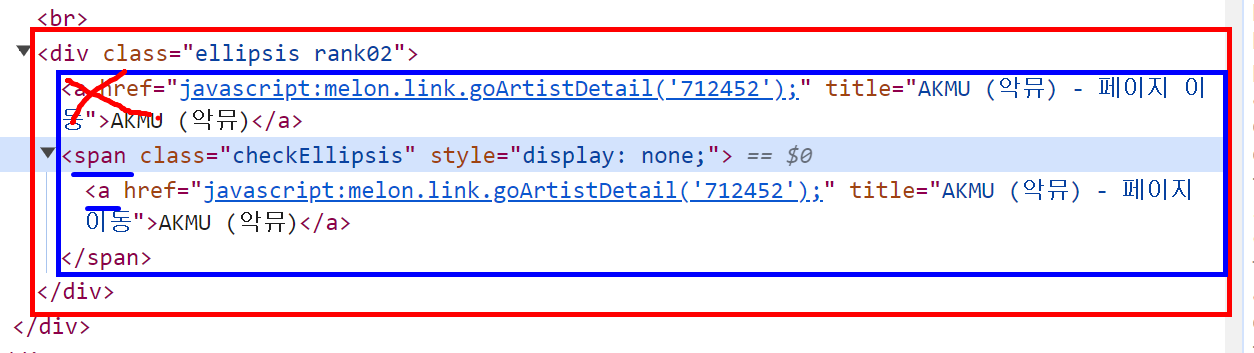

- 데이터 수집: 방대한 데이터 안에서 내가 원하는 정확한 데이터만을 추출해내는 작업
- 정확한 데이터인지 확인하는 습관들이기! -> 페이지분석

In [79]:
singer = soup.select('div.ellipsis.rank02>span')

- 콘텐츠만을 추출해서 => DataFrame으로 만들어주기 => csv파일로 내보내기

In [80]:
# 순수한 콘텐츠만을 담아줄 리스트 생성
song_list = []
singer_list = []

for i in range(len(song)):
    song_list.append(song[i].text)
    singer_list.append(singer[i].text)

In [81]:
song_list

['Love Lee',
 '후라이의 꿈',
 'Seven (feat. Latto) - Clean Ver.',
 'Smoke (Prod. Dynamicduo, Padi)',
 'You & Me',
 'Super Shy',
 'Do or Die',
 'Fast Forward',
 'ETA',
 '사랑은 늘 도망가',
 '모래 알갱이',
 'I Love My Body',
 '사막에서 꽃을 피우듯',
 'Either Way',
 '우리들의 블루스',
 '헤어지자 말해요',
 '다시 만날 수 있을까',
 'I AM',
 '무지개',
 '이제 나만 믿어요',
 'London Boy',
 'Bubble',
 'Polaroid',
 '아버지',
 '인생찬가',
 'Still With You',
 '퀸카 (Queencard)',
 'A bientot',
 'Get A Guitar',
 '잘 지내자, 우리 (여름날 우리 X 로이킴)',
 '연애편지',
 'Hype boy',
 'Fact Check (불가사의; 不可思議)',
 'Steal The Show (From “엘리멘탈”)',
 '3D (feat. Jack Harlow)',
 '이브, 프시케 그리고 푸른 수염의 아내',
 'Spicy',
 'Ditto',
 'Kitsch',
 'Love Me Again',
 'New Jeans',
 'CAKE',
 'Dynamite',
 'Summer (Feat. BE’O (비오))',
 '너의 모든 순간',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 '사건의 지평선',
 'UNFORGIVEN (feat. Nile Rodgers)',
 'After LIKE',
 'KIDDING',
 'Vancouver 2',
 'Slow Dancing',
 'LOVE DIVE',
 '사랑인가 봐',
 'Off The Record',
 "I Don't Think That I Like Her",
 '나에게 그대만이',
 'OMG',
 '심(心)',
 'Attention',
 'I WANT',
 '

In [86]:
for i in song:
    song_list.append(i.text)
for i in singer:
    singer_list.append(i.text)